## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

Example scenario: we want to find the popular vote against 2 people (Brown and Green) -- poll citizens by vote -- you call 1,000 voters and ask for their voting intention. I'm giving you a file with your findings.

In [4]:
poll = pd.read_csv('poll.csv')
poll.info()
poll.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [9]:
poll.vote.value_counts(normalize=True) #normalize true gets the proportion, aka percent by grouping

Brown    0.511
Green    0.489
Name: vote, dtype: float64

The data seem to say that Brown is going to remain mayor.

However you need to realize that the limited sample means that the proportion depends on the specific people that you happen to draw. This is known as ***sampling variability***. 

So given this poll, what can you really say about the underlying population of voters? To understand this, we need to study the sampling distribution of the proportion, namely, we wish to understand what range of different samples we may get for the same population, and we'll do this by simulation on a computer.

We can simulate this range of different samples for the same population.

#this simulates a vector of 5 random numbers between 0 and 1
np.random.rand(5)

In [11]:
np.random.rand(5) < 0.51

array([False, False,  True,  True, False])

We can combine and use the numpy function 'where' to convert this boolean to a string value

In [12]:
np.where(np.random.rand(5) < 0.51,'Brown','Green')

array(['Green', 'Brown', 'Brown', 'Green', 'Green'], dtype='<U5')

We can wrap everything into a dataframe and make a function out of it

In [13]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown,'Brown','Green')})

#n represents the "true" fraction over the entire population for Brown

In [14]:
s = sample(0.51)

In [23]:
s.head()

,vote
0,Brown
1,Brown
2,Green
3,Brown
4,Brown


In [22]:
#We can run one sample (get the counts for the 2 candidates)
s.vote.value_counts(normalize=True)

Brown    0.525
Green    0.475
Name: vote, dtype: float64

We can repeat this many times and collect the results in a DataFrame, i.e. 1000 simulated results

In [26]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [27]:
dist.head()

,Brown,Green
vote,0.501,0.499
vote,0.513,0.487
vote,0.503,0.497
vote,0.484,0.516
vote,0.514,0.486


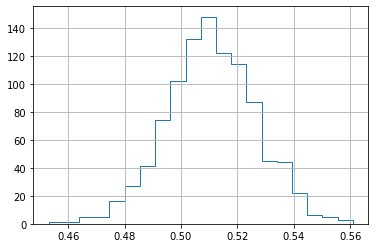

In [28]:
dist.Brown.hist(histtype='step',bins=20)

It seems for a true fraction of .51, we can get a sample proportion from .48~.55

Create a function that takes into account a confidence interval of 95%. We look for the True fraction for which a measured value of .51 lies at a 2.5% quantile, and the True fraction for which our measured value lies at the 97.5 quantile. It turns out that those two fractions are the edges of the confidence interval.

In [31]:
def samplingdist(brown,n=1000):
    #using sample function from above
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [32]:
#for the 95% percentile, this 
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [33]:
quantiles(0.5)

(0.470975, 0.533)

In [34]:
quantiles(0.54)

(0.511, 0.5690249999999999)

In [35]:
quantiles(0.48)

(0.447, 0.51)

In [36]:
dist = samplingdist(0.5,10000)

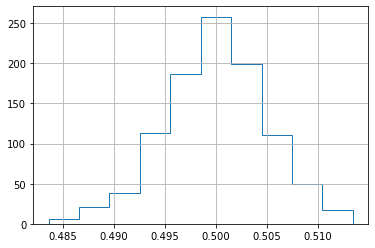

In [37]:
dist.Brown.hist(histtype='step')

In [38]:
largepoll=pd.read_csv('poll-larger.csv')

In [39]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64